In [1]:
#To plot diagrams or visualizations
import matplotlib.pyplot as plt
#A python library for array operations
import numpy as np
#A python library for data analysis
import pandas as pd

#For splitting data
from sklearn.cross_validation import train_test_split, cross_val_score, cross_val_predict, KFold


from sklearn.metrics import accuracy_score 

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv("prediction.csv")

In [3]:
df.head()

,team1,team2,season,date,competition,match_number,Ground,city,Nutral Venu,toss_winner,toss_decision,player_of_match,winner_runs,Winner
0,Pakistan,Bangladesh,2008,7/4/2008,Asia Cup,12.0,National Stadium,Karachi,0,Bangladesh,bat,Abdur Rauf,10.0,Pakistan
1,Pakistan,Hong Kong,2008,6/24/2008,Asia Cup,2.0,National Stadium,Karachi,0,Pakistan,bat,Sohail Tanvir,155.0,Pakistan
2,Pakistan,India,2008,6/26/2008,Asia Cup,5.0,National Stadium,Karachi,0,Pakistan,bat,SK Raina,6.0,India
3,Pakistan,Sri Lanka,2008,6/29/2008,Asia Cup,8.0,National Stadium,Karachi,0,Pakistan,field,KC Sangakkara,64.0,Sri Lanka
4,Pakistan,India,2008,7/2/2008,Asia Cup,10.0,National Stadium,Karachi,0,India,bat,Younis Khan,8.0,Pakistan


In [4]:
df = df.drop(['player_of_match'], axis = 1)
df = df.drop(['date'], axis = 1)

In [5]:
df = df.replace({'team1': 'Afghanistan', 'team2': 'Afghanistan'}, 0)
df = df.replace({'team1': 'Australia', 'team2': 'Australia'}, 1)
df = df.replace({'team1': 'Bangladesh', 'team2': 'Bangladesh'}, 2)
df = df.replace({'team1': 'Canada', 'team2': 'Canada'}, 3)
df = df.replace({'team1': 'England', 'team2': 'England'}, 4)
df = df.replace({'team1': 'India', 'team2': 'India'}, 5)
df = df.replace({'team1': 'Ireland', 'team2': 'Ireland'}, 6)
df = df.replace({'team1': 'Kenya', 'team2': 'Kenya'}, 7)
df = df.replace({'team1': 'New Zealand', 'team2': 'New Zealand'}, 8)
df = df.replace({'team1': 'Pakistan', 'team2': 'Pakistan'}, 9)
df = df.replace({'team1': 'Scotland', 'team2': 'Scotland'}, 10)
df = df.replace({'team1': 'South Africa', 'team2': 'South Africa'}, 11)
df = df.replace({'team1': 'Sri Lanka', 'team2': 'Sri Lanka'}, 12)
df = df.replace({'team1': 'West Indies', 'team2': 'West Indies'}, 13)
df = df.replace({'team1': 'Zimbabwe', 'team2': 'Zimbabwe'}, 14)
df = df.replace({'team1': 'Hong Kong', 'team2': 'Hong Kong'}, 15)
df = df.replace({'team1': 'United Arab Emirates', 'team2': 'United Arab Emirates'}, 16)

In [6]:
df.team1 = df.team1.astype('category')
df.team2 = df.team2.astype('category')
df.team2.dtype

category

In [7]:
df.competition.unique()

array(['Asia Cup', 'Kitply Cup', 'ODI Series', 'NatWest Series',
       'ICC Champions Trophy', 'ICC World Cup', 'DLF Cup'], dtype=object)

In [8]:
df.competition = pd.Categorical(df.competition, ['Asia Cup', 'Kitply Cup', 'ODI Series', 'NatWest Series', 
                                                 'ICC Champions Trophy', 'ICC World Cup', 'DLF Cup'], ordered = True)
df.competition = df.competition.cat.codes

In [9]:
df.toss_decision = pd.Categorical(df.toss_decision, ['field', 'bat'], ordered = True)
df.toss_decision = df.toss_decision.cat.codes

In [10]:
df.city = pd.Categorical(df.city, ['Karachi', 'Mirpur', 'Dubai', 'Abu Dhabi', 'Dumbulla', 'Colombo',
                                   'Chester-le-Street', 'Leeds', 'London', 'Southampton', 'Bulawayo',
                                   'Harare', 'St Lucia', 'Barbados', 'Guyana', 'United Arab Emirates',
                                   'Kandy', 'Birmingham', 'Edinburgh', 'Dublin', 'Hambantota',
                                   'Lahore', 'Nottingham', 'Cardiff', 'Manchester', 'Taunton',
                                   'Rawalpindi', 'Jamaica', 'Jaipur', 'Chandigarh', 'Centurion',
                                   'Durban', 'Port Elizabeth', 'Cape Town', 'Johannesburg',
                                   'Faisalabad', 'Multan', 'Gwalior', 'Guwahati', 'Kanpur',
                                   'Sheikhupura', 'Parklands', 'Perth', 'Brisbane', 'Sydney',
                                   'Wellington', 'Auckland', 'Christchurch', 'Napier', 'Hamilton',
                                   'Chittagong', 'Benoni', 'Bloemfontein', 'Chennai', 'Kolkata',
                                   'Delhi', 'Fatullah'], ordered = True)
df.city = df.city.cat.codes

In [11]:
df.toss_winner = pd.Categorical(df.toss_winner, ['Bangladesh', 'Pakistan', 'India', 'Australia', 'Sri Lanka',
                                                 'England', 'Zimbabwe', 'West Indies', 'South Africa', 'Ireland',
                                                 'New Zealand', 'Afghanistan', 'United Arab Emirates'], ordered = True)
df.toss_winner = df.toss_winner.cat.codes

In [12]:
df.Winner = pd.Categorical(df.Winner, ['Pakistan', 'India', 'Sri Lanka', 'Australia', 'England',
                                       'West Indies', 'tie', 'South Africa', 'Zimbabwe', 'Bangladesh',
                                       'Ireland', 'New Zealand'], ordered = True)
df.Winner = df.Winner.cat.codes

In [13]:
df.Ground = pd.Categorical(df.Ground, ['National Stadium', 'Shere Bangla National Stadium',
                                       'Dubai Sports City Cricket Stadium', 'Sheikh Zayed Stadium',
                                       'Rangiri Dambulla International Stadium', 'R Premadasa Stadium',
                                       'Riverside Ground', 'Headingley', 'Kennington Oval', "Lord's",
                                       'The Rose Bowl', 'Queens Sports Club', 'Harare Sports Club',
                                       'Beausejour Stadium, Gros Islet', 'Kensington Oval, Bridgetown',
                                       'Providence Stadium', 'Sharjah Cricket Stadium',
                                       'Pallekele International Cricket Stadium', 'Edgbaston',
                                       'Grange Cricket Club Ground, Raeburn Place',
                                       'Clontarf Cricket Club Ground',
                                       'Mahinda Rajapaksa International Cricket Stadium, Sooriyawewa',
                                       'Gaddafi Stadium', 'The Village, Malahide', 'Trent Bridge',
                                       'Sophia Gardens', 'Old Trafford',
                                       'The Cooper Associates County Ground', 'Rawalpindi Cricket Stadium',
                                       'Sinhalese Sports Club Ground', 'Sabina Park, Kingston',
                                       'Sawai Mansingh Stadium',
                                       'Punjab Cricket Association Stadium, Mohali', 'SuperSport Park',
                                       'Kingsmead', "St George's Park", 'Newlands',
                                       'New Wanderers Stadium', 'Iqbal Stadium', 'Multan Cricket Stadium',
                                       'Captain Roop Singh Stadium', 'Nehru Stadium', 'Green Park',
                                       'Sheikhupura Stadium', 'Adelaide Oval',
                                       'Western Australia Cricket Association Ground',
                                       'Brisbane Cricket Ground, Woolloongabba', 'Sydney Cricket Ground',
                                       'Dubai International Cricket Stadium', 'Westpac Stadium',
                                       'Queenstown Events Centre', 'AMI Stadium', 'McLean Park',
                                       'Seddon Park', 'Eden Park', 'Zahur Ahmed Chowdhury Stadium',
                                       'Willowmoore Park', 'Chevrolet Park',
                                       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
                                       'Feroz Shah Kotla', 'Khan Shaheb Osman Ali Stadium', 'Hagley Oval',
                                       'Basin Reserve', 'Melbourne Cricket Ground'], ordered = True)
df.Ground = df.Ground.cat.codes

In [14]:
df.head()

,team1,team2,season,competition,match_number,Ground,city,Nutral Venu,toss_winner,toss_decision,winner_runs,Winner
0,9,2,2008,0,12.0,0,0,0,0,1,10.0,0
1,9,15,2008,0,2.0,0,0,0,1,1,155.0,0
2,9,5,2008,0,5.0,0,0,0,1,1,6.0,1
3,9,12,2008,0,8.0,0,0,0,1,0,64.0,2
4,9,5,2008,0,10.0,0,0,0,2,1,8.0,0


In [15]:
df.winner_runs = df.winner_runs.astype('O')
#df.Winner = df.Winner.astype('O')
#df.player_of_match = df.player_of_match.astype('O')
#df.toss_decision = df.toss_decision.astype('O')
#df.toss_winner = df.toss_winner.astype('O')
#df.city = df.city.astype('O')
#df.Ground = df.Ground.astype('O')
df.match_number = df.match_number.astype('O')
#df.competition = df.competition.astype('O')
df.season = df.season.astype('O')
#df.team2 = df.team2.astype('O')
#df.team1 = df.team1.astype('O')

In [16]:
df.team2.unique()

[2, 15, 5, 12, 9, 13, 11, 14, 16]
Categories (9, int64): [2, 15, 5, 12, ..., 13, 11, 14, 16]

In [17]:
len(df.team1.unique())

15

In [18]:
df.isnull().values.sum()

2

In [19]:
print(df["match_number"].isnull().values.sum())
print(df["winner_runs"].isnull().values.sum())

1
1


In [20]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace = True)
df.isnull().values.sum()

0

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


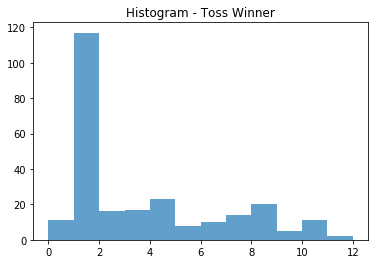

In [21]:
# Histogram - Toss Winner

plt.hist(df['toss_winner'], bins=12, normed=False, histtype='stepfilled', alpha=0.7)
plt.title('Histogram - Toss Winner')
plt.show()


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


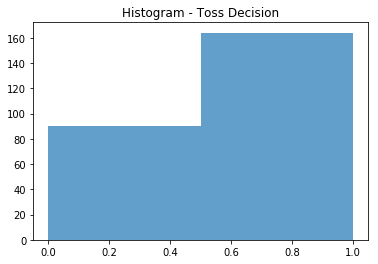

In [22]:
# Histogram - Toss Decision

plt.hist(df['toss_decision'], bins=2, normed=False, histtype='stepfilled', alpha=0.7)
plt.title('Histogram - Toss Decision')
plt.show()


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


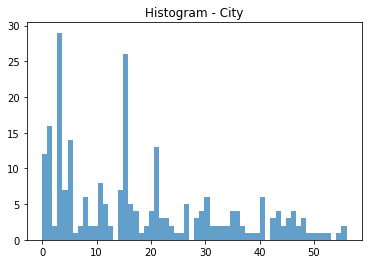

In [23]:
# Histogram - City

plt.hist(df['city'], bins=60, normed=False, histtype='stepfilled', alpha=0.7)
plt.title('Histogram - City')
plt.show()


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


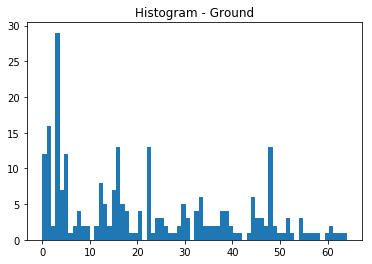

In [24]:
# Histogram - Ground

plt.hist(df['Ground'], bins=70, normed=False, histtype='stepfilled', alpha=1.0)
plt.title('Histogram - Ground')
plt.show()


In [25]:
X = df.drop('Winner',axis=1)
y = df.Winner

In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [28]:
X_train.shape

(203, 11)

In [29]:
X_test.shape

(51, 11)

In [30]:
rfc = RandomForestRegressor(n_estimators=20, random_state=0)
rfc.fit(X, y)
# print(model.score(np.nan_to_num(X),Y))
print(rfc.score(np.nan_to_num(X_train),y_train))
print(rfc.score(np.nan_to_num(X_test),y_test))

0.890417831728
0.887659028728


In [31]:
#To find accuracy of this model
accuracy = rfc.score(X_test,y_test)
print(accuracy)

0.887659028728


In [32]:
X_new = [(9, 2, 2008, 0, 12.0, 0, 0, 0, 0, 1, 10.0)]

In [33]:
y_new = rfc.predict(X_new)

In [34]:
print(y_new)

[ 0.05]


In [35]:
if y_new <= 0.5:
    print('Pakistan')
elif y_new > 0.5 or y_new <= 1.5:
    print('India')
elif y_new > 1.5 or y_new <= 2.5:
    print('Sri Lanka')
elif y_new > 2.5 or y_new <= 3.5:
    print('Australia')
elif y_new > 3.5 or y_new <= 4.5:
    print('England')
elif y_new > 4.5 or y_new <= 5.5:
    print('West Indies')
elif y_new > 5.5 or y_new <= 6.5:
    print('tie')
elif y_new > 6.5 or y_new <= 7.5:
    print('South Africa')
elif y_new > 7.5 or y_new <= 8.5:
    print('Zimbabwe')
elif y_new > 8.5 or y_new <= 9.5:
    print('Bangladesh')
elif y_new > 9.5 or y_new <= 10.5:
    print('Ireland')
elif y_new > 10.5 or y_new <= 11.5:
    print('New Zealand')

Pakistan


In [36]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X, y)

print(clf_gini.score(np.nan_to_num(X_train),y_train))
print(clf_gini.score(np.nan_to_num(X_test),y_test))

0.576354679803
0.607843137255


In [37]:
#To find accuracy of this model
accuracy = clf_gini.score(X_test,y_test)
print(accuracy)

0.607843137255


In [38]:
reg = LinearRegression()
reg.fit(X, y)

print(reg.score(np.nan_to_num(X_train),y_train))
print(reg.score(np.nan_to_num(X_test),y_test))

0.101439096201
0.0658287371205


In [39]:
#To find accuracy of this model
accuracy = reg.score(X_test,y_test)
print(accuracy)

0.0658287371205
